## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2023-24 учебный год

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены автором. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones). 

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано на [страничке датасета](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [100]:
sns.set_theme()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [4]:
train.shape

(7352, 563)

In [5]:
train.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [6]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [7]:
train = train[cols_subset]
test = test[cols_subset]

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [270]:
train.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [269]:
train.isna().sum()

tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

In [9]:
print('Пропусков нет')

Пропусков нет


### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [10]:
test.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         2947.000000            2947.000000          2947.000000   
mean            -0.559043              -0.735661             0.696878   
std              0.439539               0.282074             0.502873   
min             -0.998936              -1.000000            -0.756774   
25%             -0.978433              -0.989078             0.836787   
50%             -0.861830              -0.914698             0.934930   
75%             -0.149596              -0.486423             0.970871   
max              0.479547               0.117606             0.996148   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       2947.000000                   2947.000000           2947.000000   
mean          -0.462063                     -0.880361             -0.513923   
std            0.523916                      0.160496              0.509205   
min           -0.952357                     -0.999989             -0.984195   
25%           -0.934447                     -0.999330             -0.829722   
50%           -0.852659                     -0.979336             -0.729648   
75%           -0.009965                     -0.799113             -0.545939   
max            0.786436                      0.048730              0.833180   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           2947.000000           2947.000000            2947.000000   
mean               0.074886             -0.048720              -0.154042   
std                0.324300              0.241467               0.392203   
min               -0.913704             -0.949228              -1.000000   
25%                0.022140             -0.098485              -0.497070   
50%                0.181563             -0.010671              -0.202050   
75%                0.260252              0.092373               0.140254   
max                1.000000              0.973113               0.960367   

           subject  
count  2947.000000  
mean     12.986427  
std       6.950984  
min       2.000000  
25%       9.000000  
50%      12.000000  
75%      18.000000  
max      24.000000

In [14]:
train.describe()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
count         7352.000000            7352.000000          7352.000000   
mean            -0.543884              -0.727735             0.678505   
std              0.477653               0.315832             0.508656   
min             -1.000000              -0.999889            -1.000000   
25%             -0.983282              -0.991595             0.804270   
50%             -0.883371              -0.950268             0.926693   
75%             -0.106892              -0.474625             0.965095   
max              1.000000               1.000000             1.000000   

       tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
count       7352.000000                   7352.000000           7352.000000   
mean          -0.468604                     -0.847963             -0.489547   
std            0.544547                      0.233633              0.511807   
min           -1.000000                     -1.000000             -1.000000   
25%           -0.936219                     -0.999480             -0.812065   
50%           -0.881637                     -0.986582             -0.709417   
75%           -0.017129                     -0.764508             -0.509079   
max            1.000000                      1.000000              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
count           7352.000000           7352.000000            7352.000000   
mean               0.058593             -0.056515              -0.128562   
std                0.297480              0.279122               0.403686   
min               -1.000000             -1.000000              -0.931208   
25%               -0.017885             -0.143414              -0.486841   
50%                0.182071              0.003181              -0.163271   
75%                0.248353              0.107659               0.155112   
max                0.478157              1.000000               1.000000   

           subject  
count  7352.000000  
mean     17.413085  
std       8.975143  
min       1.000000  
25%       8.000000  
50%      19.000000  
75%      26.000000  
max      30.000000

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

In [257]:
print(f'TEST STANDING COUNT:\n{test[(test["Activity"] == "STANDING")].shape[0]}')
print(f'TEST WALKING COUNT:\n{test[(test["Activity"] == "WALKING")].shape[0]}')
print(f'TEST SITTING COUNT:\n{test[(test["Activity"] == "SITTING")].shape[0]}')
print(f'TEST LAYING COUNT:\n{test[(test["Activity"] == "LAYING")].shape[0]}')
print(f'TEST WALKING_UPSTAIRS COUNT:\n{test[(test["Activity"] == "WALKING_UPSTAIRS")].shape[0]}')
print(f'TEST WALKING_DOWNSTAIRS COUNT:\n{test[(test["Activity"] == "WALKING_DOWNSTAIRS")].shape[0]}')
print("\n")
print(f'TRAIN STANDING COUNT:\n{train[(train["Activity"] == "STANDING")].shape[0]}')
print(f'TRAIN WALKING COUNT:\n{train[(train["Activity"] == "WALKING")].shape[0]}')
print(f'TRAIN SITTING COUNT:\n{train[(train["Activity"] == "SITTING")].shape[0]}')
print(f'TRAIN LAYING COUNT:\n{train[(train["Activity"] == "LAYING")].shape[0]}')
print(f'TRAIN WALKING_UPSTAIRS COUNT:\n{train[(train["Activity"] == "WALKING_UPSTAIRS")].shape[0]}')
print(f'TRAIN WALKING_DOWNSTAIRS COUNT:\n{train[(train["Activity"] == "WALKING_DOWNSTAIRS")].shape[0]}')

TEST STANDING COUNT:
532
TEST WALKING COUNT:
496
TEST SITTING COUNT:
491
TEST LAYING COUNT:
537
TEST WALKING_UPSTAIRS COUNT:
471
TEST WALKING_DOWNSTAIRS COUNT:
420


TRAIN STANDING COUNT:
1374
TRAIN WALKING COUNT:
1226
TRAIN SITTING COUNT:
1286
TRAIN LAYING COUNT:
1407
TRAIN WALKING_UPSTAIRS COUNT:
1073
TRAIN WALKING_DOWNSTAIRS COUNT:
986


### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [8]:
trainCol = train.iloc[ : ,[1,2,3,4,5,6,7,8,9]]
testCol = test.iloc[ : , [1,2,3,4,5,6,7,8,9]]
trainCol

tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  tBodyAcc-max()-X  \
0                 -0.992165             0.977436         -0.934724   
1                 -0.989876             0.984520         -0.943068   
2                 -0.987868             0.986770         -0.938692   
3                 -0.991241             0.986821         -0.938692   
4                 -0.992882             0.987434         -0.942469   
...                     ...                  ...               ...   
7347              -0.533656             0.920554          0.210795   
7348              -0.609540             0.920554          0.117440   
7349              -0.662918             0.933008          0.043999   
7350              -0.645452             0.933008          0.101702   
7351              -0.688840             0.916729          0.269013   

      fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0                        -0.993592             -0.841247   
1                        -0.998235             -0.844788   
2                        -0.999388             -0.848933   
3                        -0.999807             -0.848649   
4                        -0.999806             -0.847865   
...                            ...                   ...   
7347                     -0.274644             -0.791883   
7348                     -0.310596             -0.771840   
7349                      0.034897             -0.779133   
7350                      0.040506             -0.785181   
7351                     -0.106766             -0.783267   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
0                 0.179941             -0.058627               0.142051   
1                 0.180289             -0.054317              -0.692541   
2                 0.180637             -0.049118              -0.727227   
3                 0.181935             -0.047663              -0.599118   
4                 0.185151             -0.043892              -0.676997   
...                    ...                   ...                    ...   
7347              0.238604              0.049819              -0.154387   
7348              0.252676              0.050053              -0.053694   
7349              0.249145              0.040811               0.363110   
7350              0.246432              0.025339               0.382837   
7351              0.246809              0.036695              -0.243589   

      subject  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
7347       30  
7348       30  
7349       30  
7350       30  
7351       30  

[7352 rows x 9 columns]

In [9]:
correlation = trainCol.corr()
correlation

tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
tBodyGyroJerk-mad()-X                      1.000000             0.380118   
tGravityAcc-min()-X                        0.380118             1.000000   
tBodyAcc-max()-X                           0.879900             0.380404   
fBodyAcc-bandsEnergy()-1,8.2               0.507939             0.239088   
angle(X,gravityMean)                      -0.382246            -0.988663   
angle(Y,gravityMean)                       0.478567             0.797116   
angle(Z,gravityMean)                       0.380967             0.667415   
fBodyAcc-skewness()-X                      0.266002            -0.261676   
subject                                   -0.110321            -0.042371   

                              tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  \
tBodyGyroJerk-mad()-X                 0.879900                      0.507939   
tGravityAcc-min()-X                   0.380404                      0.239088   
tBodyAcc-max()-X                      1.000000                      0.613383   
fBodyAcc-bandsEnergy()-1,8.2          0.613383                      1.000000   
angle(X,gravityMean)                 -0.384192                     -0.213318   
angle(Y,gravityMean)                  0.480229                      0.363170   
angle(Z,gravityMean)                  0.405023                      0.423927   
fBodyAcc-skewness()-X                 0.335708                      0.260316   
subject                              -0.055633                     -0.037000   

                              angle(X,gravityMean)  angle(Y,gravityMean)  \
tBodyGyroJerk-mad()-X                    -0.382246              0.478567   
tGravityAcc-min()-X                      -0.988663              0.797116   
tBodyAcc-max()-X                         -0.384192              0.480229   
fBodyAcc-bandsEnergy()-1,8.2             -0.213318              0.363170   
angle(X,gravityMean)                      1.000000             -0.783848   
angle(Y,gravityMean)                     -0.783848              1.000000   
angle(Z,gravityMean)                     -0.643655              0.594885   
fBodyAcc-skewness()-X                     0.265523             -0.046213   
subject                                   0.026137             -0.009829   

                              angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
tBodyGyroJerk-mad()-X                     0.380967               0.266002   
tGravityAcc-min()-X                       0.667415              -0.261676   
tBodyAcc-max()-X                          0.405023               0.335708   
fBodyAcc-bandsEnergy()-1,8.2              0.423927               0.260316   
angle(X,gravityMean)                     -0.643655               0.265523   
angle(Y,gravityMean)                      0.594885              -0.046213   
angle(Z,gravityMean)                      1.000000              -0.183815   
fBodyAcc-skewness()-X                    -0.183815               1.000000   
subject                                  -0.098712               0.019742   

                               subject  
tBodyGyroJerk-mad()-X        -0.110321  
tGravityAcc-min()-X          -0.042371  
tBodyAcc-max()-X             -0.055633  
fBodyAcc-bandsEnergy()-1,8.2 -0.037000  
angle(X,gravityMean)          0.026137  
angle(Y,gravityMean)         -0.009829  
angle(Z,gravityMean)         -0.098712  
fBodyAcc-skewness()-X         0.019742  
subject                       1.000000

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

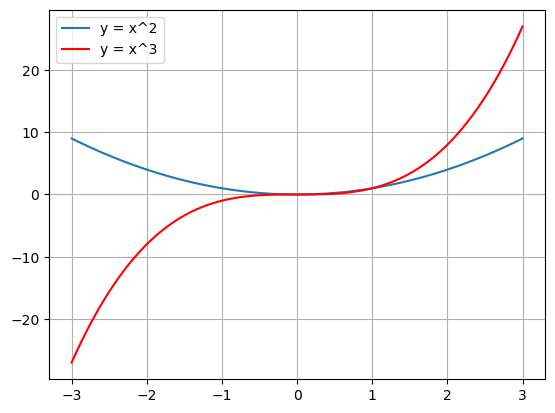

In [10]:
def f(x):
    return x**2

def g(x):
    return x**3

x = np.linspace(-3, 3, 100 )
f = f(x)
g = g(x)

plt.plot(x, f, label = 'y = x^2')
plt.plot(x, g, color = 'red', label = 'y = x^3')
plt.grid()
plt.legend()
plt.show()

### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

In [11]:
import matplotlib.axes as ax
test.head()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.866929              -0.910363             0.944461   
1           -0.968961              -0.968614             0.944461   
2           -0.976228              -0.983723             0.948704   
3           -0.974325              -0.983995             0.947309   
4           -0.975836              -0.988244             0.946221   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.894088                     -0.924705             -0.720009   
1         -0.894088                     -0.997186             -0.698091   
2         -0.939260                     -0.999083             -0.702771   
3         -0.938610                     -0.999171             -0.698954   
4         -0.938610                     -0.999355             -0.692245   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.276801             -0.057978              -0.571999        2   
1              0.281343             -0.083898              -0.918176        2   
2              0.280083             -0.079346              -0.384114        2   
3              0.284114             -0.077108              -0.635581        2   
4              0.290722             -0.073857              -0.507391        2   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING

<Figure size 2000x1000 with 0 Axes>

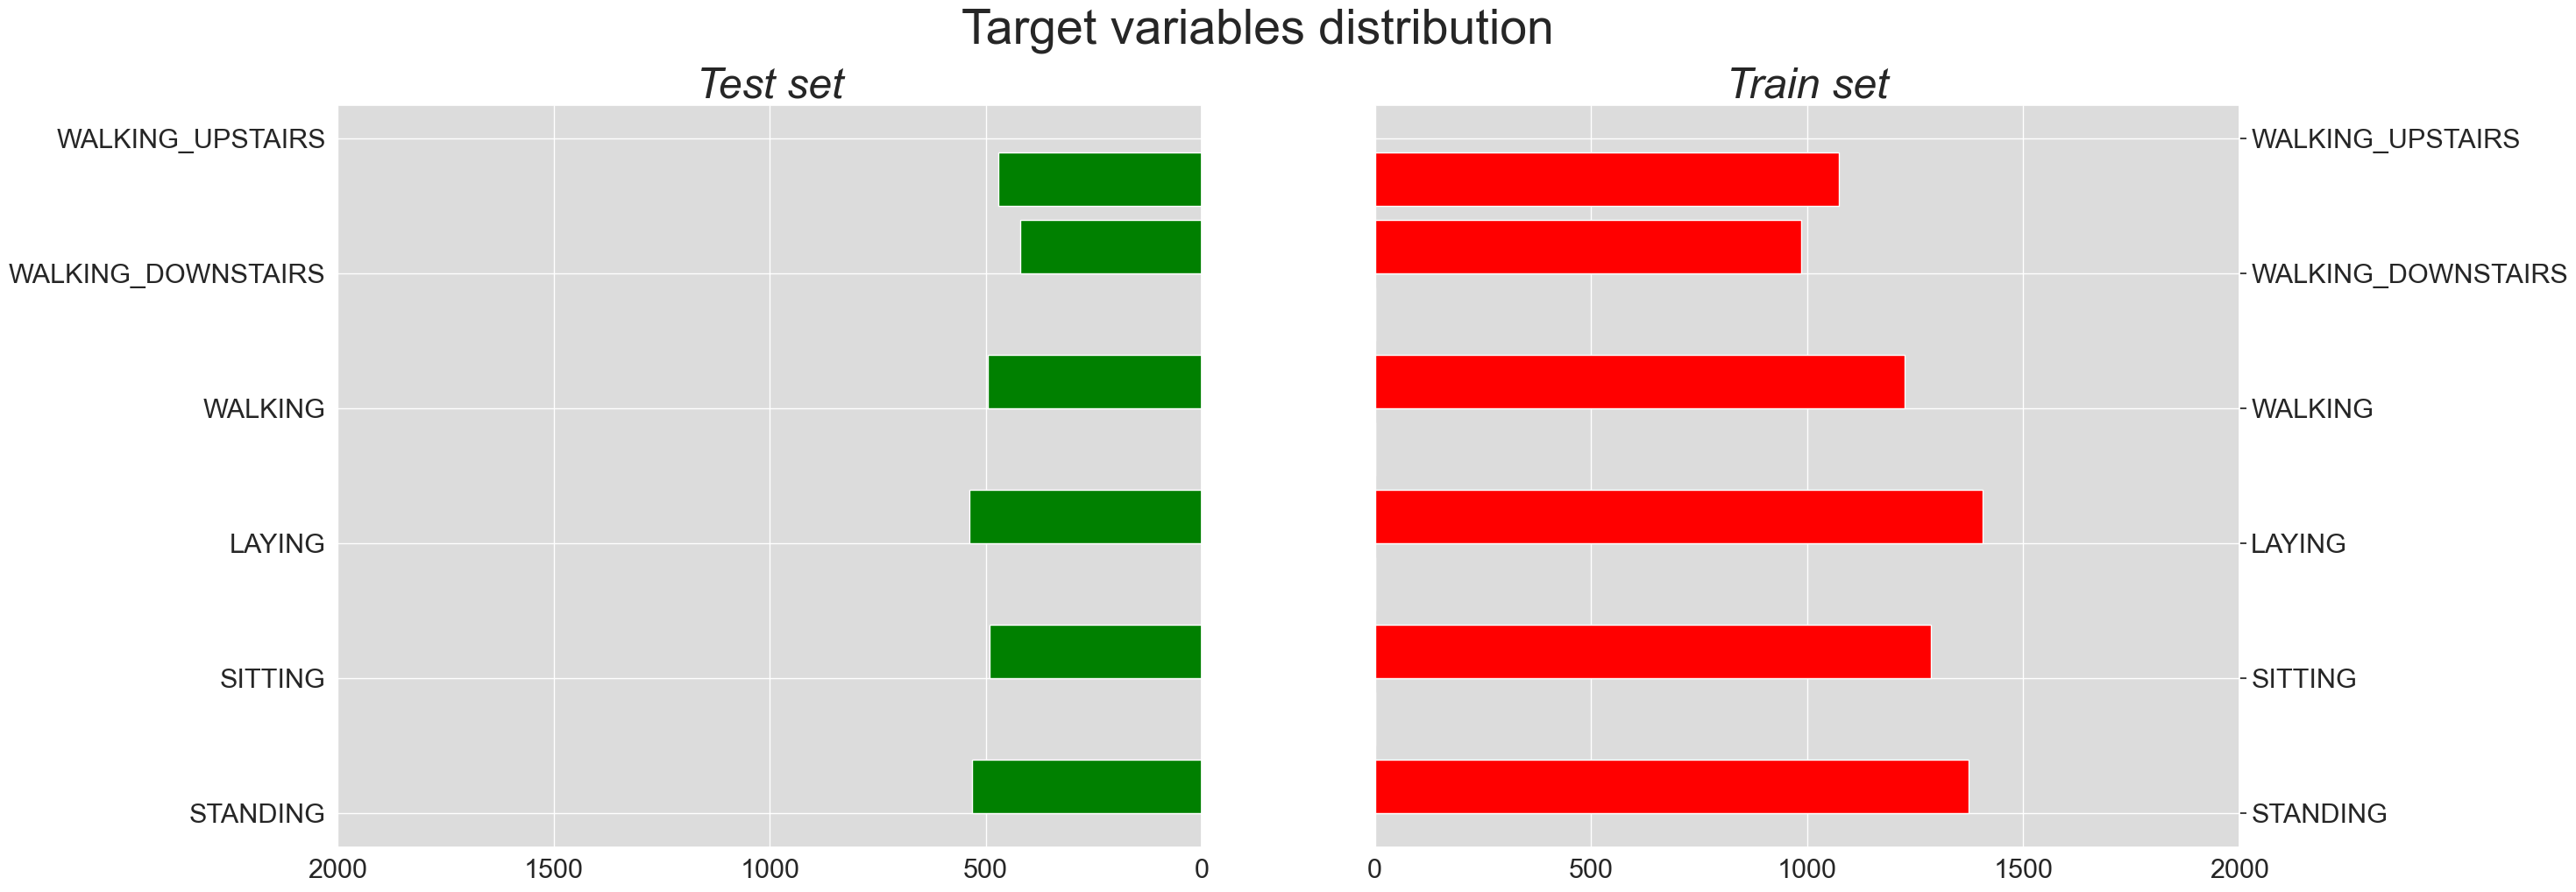

In [274]:
plt.figure(figsize = (20,10))
graph, (plot_1, plot_2) = plt.subplots(1, 2)
index = ['STANDING', 'LAYING', 'WALKING', 'SITTING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
plot_1.hist(test.Activity, orientation = "horizontal", color='green', height = 0.4)
plot_1.set_title('Test set', fontsize = 35, fontstyle = 'oblique')
plot_1.invert_xaxis()
plot_1.set_xticks([0, 500,1000,1500,2000])

plot_1.tick_params(axis='both', which='major', labelsize=22)
plot_1.set_facecolor('gainsboro')


plot_2.hist(train["Activity"], orientation = "horizontal", color='red', height = 0.4)
plot_2.set_title('Train set', fontsize = 35, fontstyle = 'oblique')
plot_2.tick_params(labelright='on')
plot_2.yaxis.tick_right()
plot_2.set_xticks([0, 500,1000,1500,2000])

plot_2.tick_params(axis='both', which='major', labelsize=22)
plot_2.set_facecolor('gainsboro')

graph.suptitle('Target variables distribution', fontsize = 40)
graph.set_figwidth(28)
graph.set_figheight(11)


## Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать. 

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

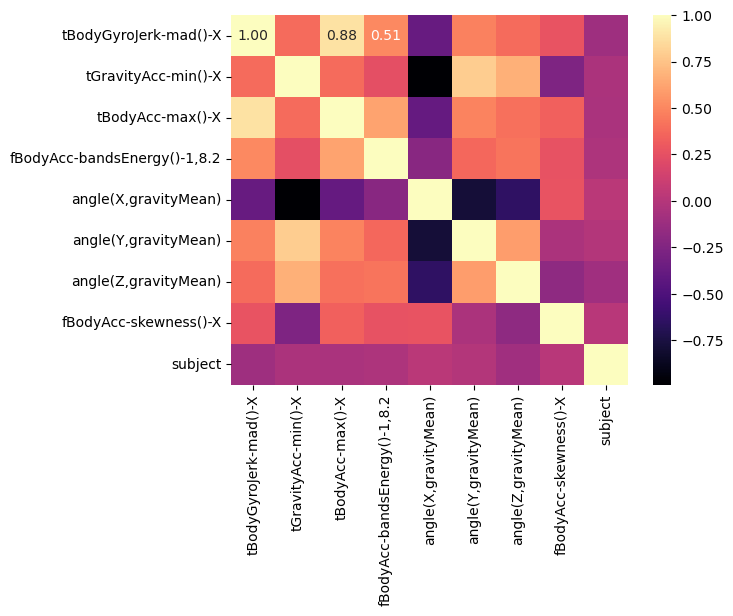

In [16]:
ax = sns.heatmap(trainCol.corr(), cmap="magma", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")


В colab прогружается, в jupyter - нет


### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков. 

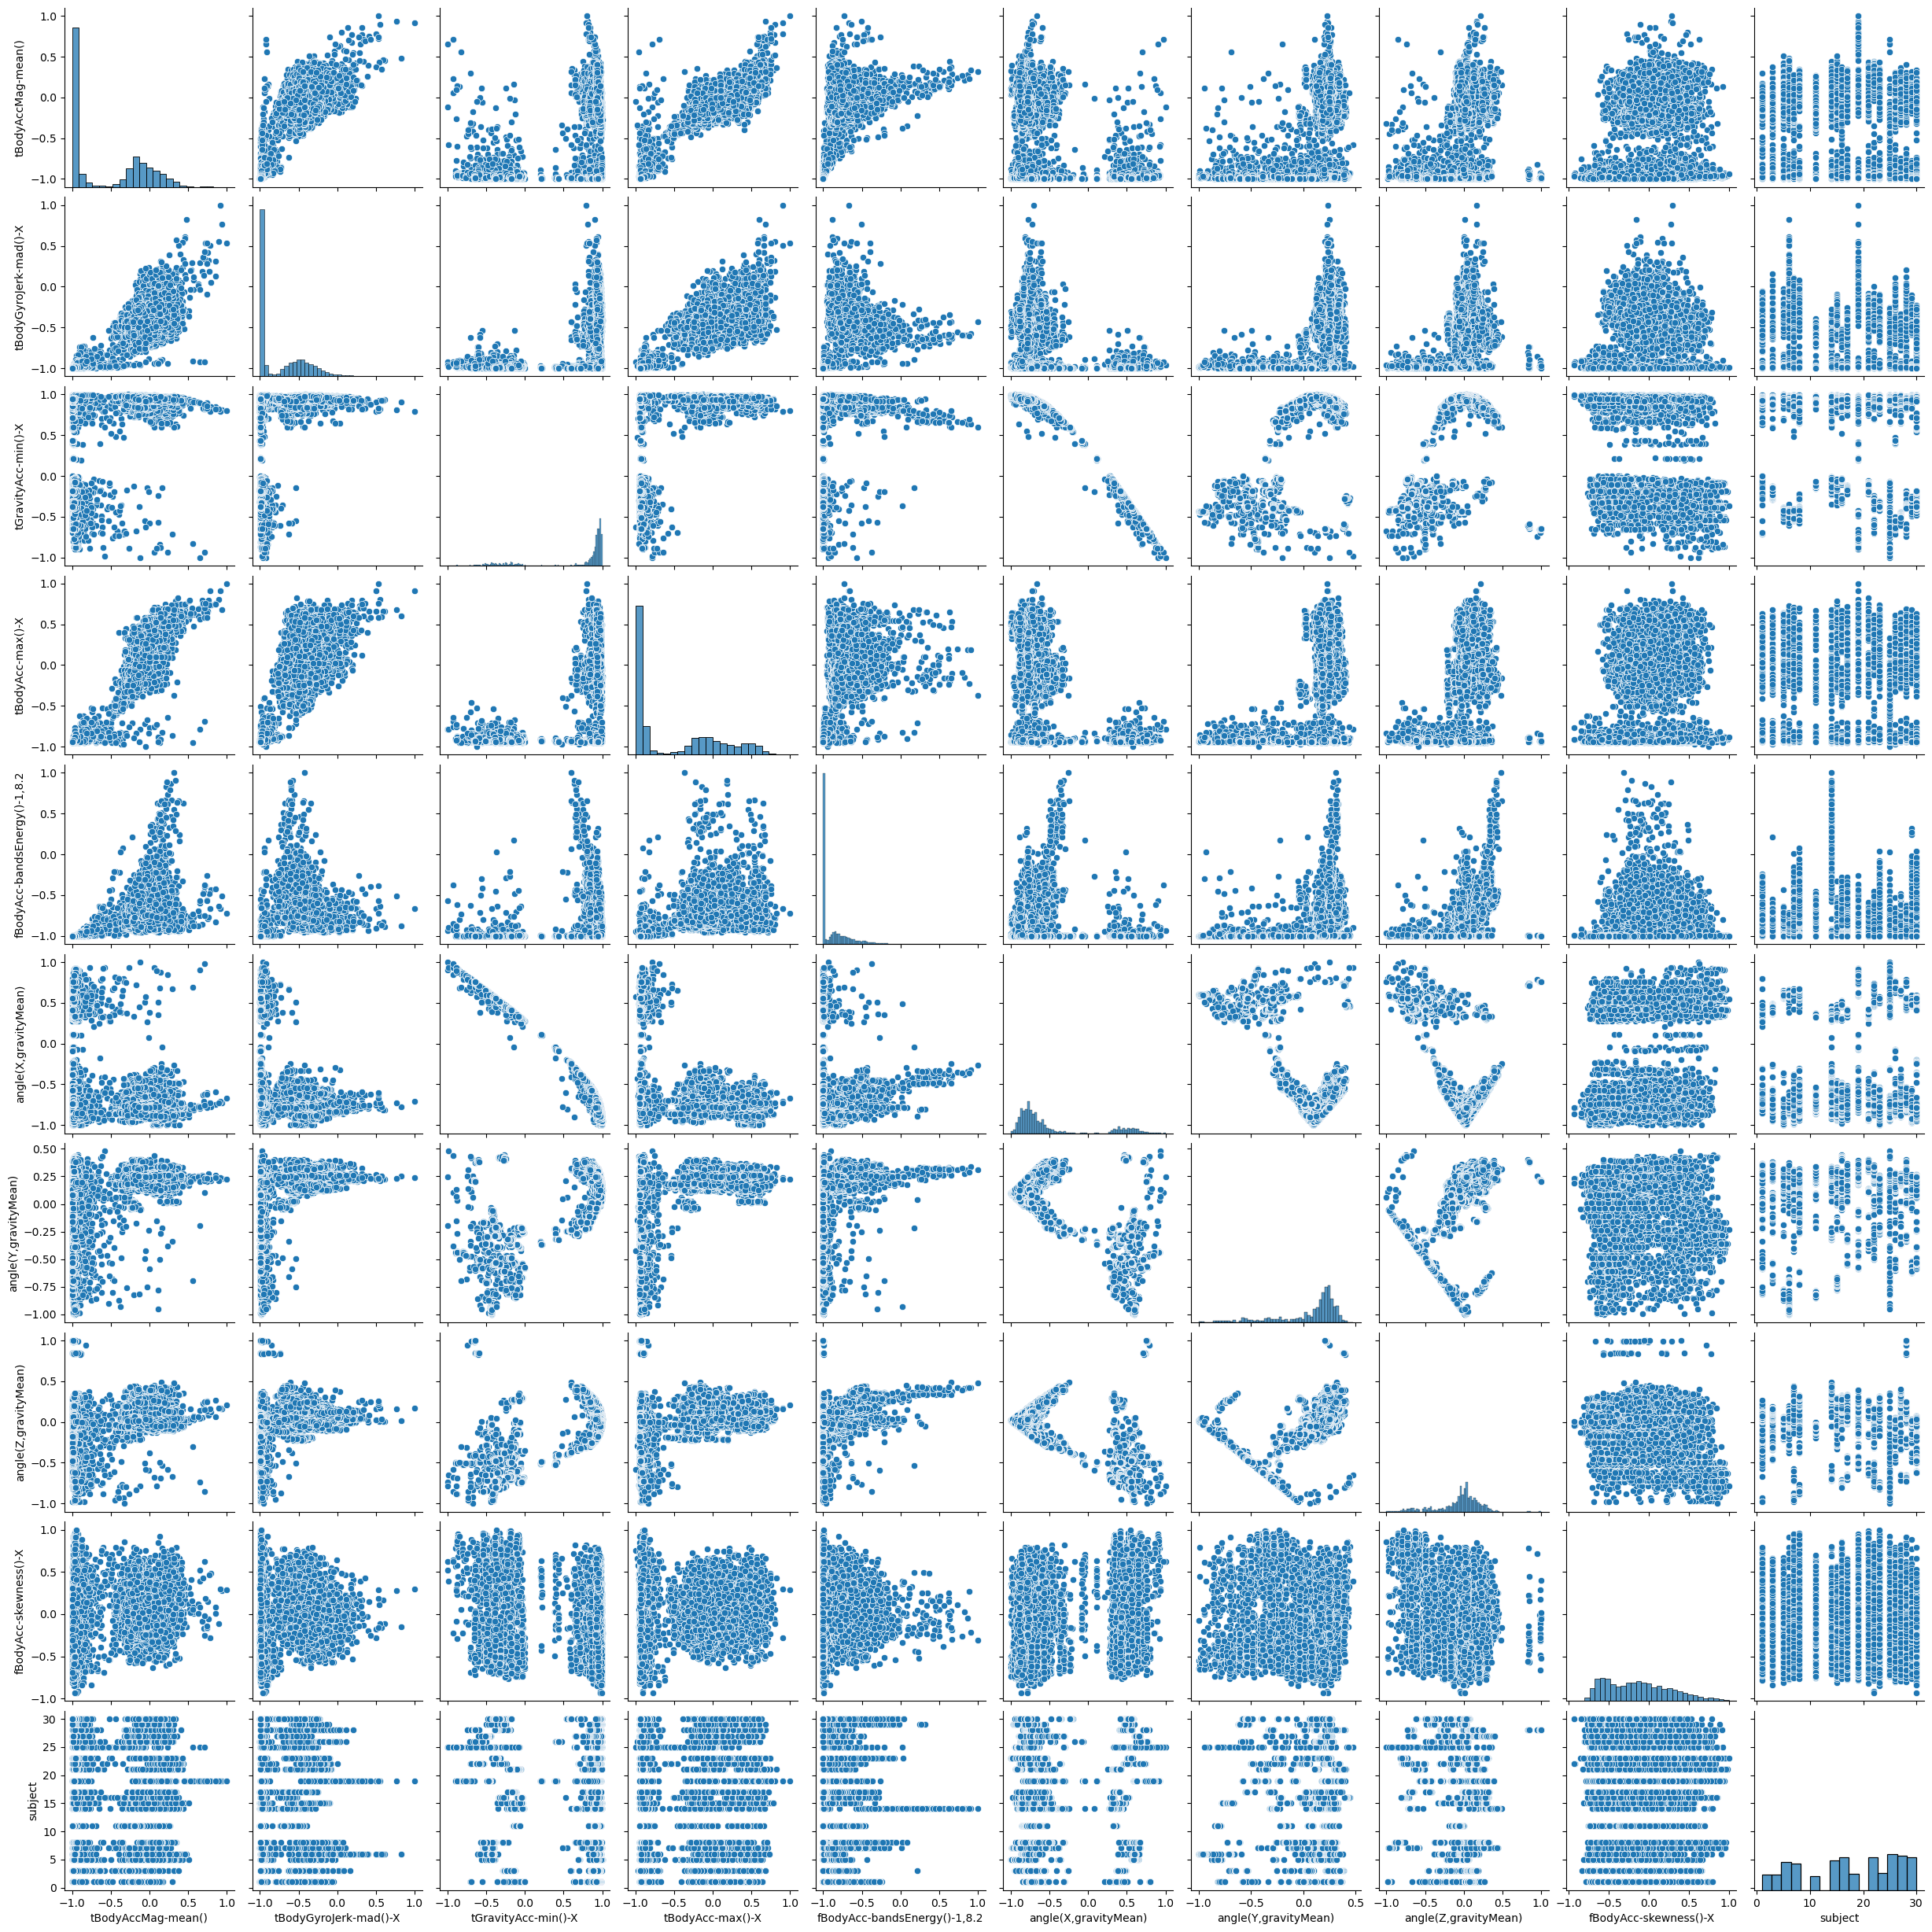

In [289]:
sns.pairplot(train)

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы. 

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

In [18]:
frequency = train['Activity'].value_counts()
print(frequency)

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


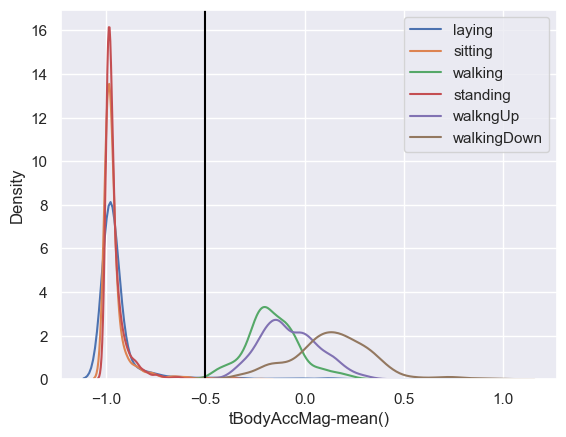

In [102]:
laying = train[(train['Activity'] == 'LAYING')]
standing = train[(train['Activity'] == 'STANDING')]
sitting = train[(train['Activity'] == 'SITTING')]
walking = train[(train['Activity'] == 'WALKING')]
walkingUp = train[(train['Activity'] == 'WALKING_UPSTAIRS')]
walkingDown = train[(train['Activity'] == 'WALKING_DOWNSTAIRS')]
sns.kdeplot(laying['tBodyAccMag-mean()'], label = "laying")
sns.kdeplot(sitting['tBodyAccMag-mean()'], label = 'sitting')
sns.kdeplot(walking['tBodyAccMag-mean()'], label = 'walking')
sns.kdeplot(standing['tBodyAccMag-mean()'], label = 'standing')
sns.kdeplot(walkingUp['tBodyAccMag-mean()'], label = 'walkngUp')
sns.kdeplot(walkingDown['tBodyAccMag-mean()'], label = 'walkingDown')
x = [0.5]
plt.axvline(x = -0.5, color = 'black')
plt.legend()

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

In [58]:
train[(train['Activity'] == 'LAYING')]

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
51             -0.905123              -0.977912            -0.289102   
52             -0.987446              -0.996606            -0.194196   
53             -0.997988              -0.997441            -0.165103   
54             -0.999504              -0.998576            -0.165103   
55             -0.999058              -0.998958            -0.163477   
...                  ...                    ...                  ...   
7257           -0.988096              -0.996433            -0.388373   
7258           -0.991491              -0.996261            -0.388372   
7259           -0.996899              -0.997440            -0.379989   
7260           -0.996091              -0.997958            -0.378028   
7261           -0.994281              -0.997880            -0.377055   

      tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
51           -0.785104                     -0.990528              0.432479   
52           -0.920051                     -0.999538              0.399853   
53           -0.940164                     -0.999979              0.399066   
54           -0.940773                     -0.999959              0.399555   
55           -0.942673                     -0.999870              0.398889   
...                ...                           ...                   ...   
7257         -0.925886                     -0.999685              0.565442   
7258         -0.925886                     -0.999735              0.562080   
7259         -0.939157                     -0.999933              0.559409   
7260         -0.939157                     -0.999868              0.558825   
7261         -0.940675                     -0.999680              0.557893   

      angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  \
51               -0.553351             -0.432876               0.378035   
52               -0.550364             -0.427593               0.228383   
53               -0.546725             -0.431244              -0.222316   
54               -0.546477             -0.431646              -0.260760   
55               -0.546712             -0.431207              -0.531937   
...                    ...                   ...                    ...   
7257             -0.534374             -0.470897               0.236563   
7258             -0.531512             -0.473734              -0.082024   
7259             -0.529620             -0.475579               0.179147   
7260             -0.529376             -0.475804              -0.306079   
7261             -0.529974             -0.475136              -0.181479   

      subject Activity  
51          1   LAYING  
52          1   LAYING  
53          1   LAYING  
54          1   LAYING  
55          1   LAYING  
...       ...      ...  
7257       30   LAYING  
7258       30   LAYING  
7259       30   LAYING  
7260       30   LAYING  
7261       30   LAYING  

[1407 rows x 11 columns]

In [73]:
col = 'angle(X,gravityMean)'

Text(0.5, 1.0, 'Box-Whisker plot for angles')

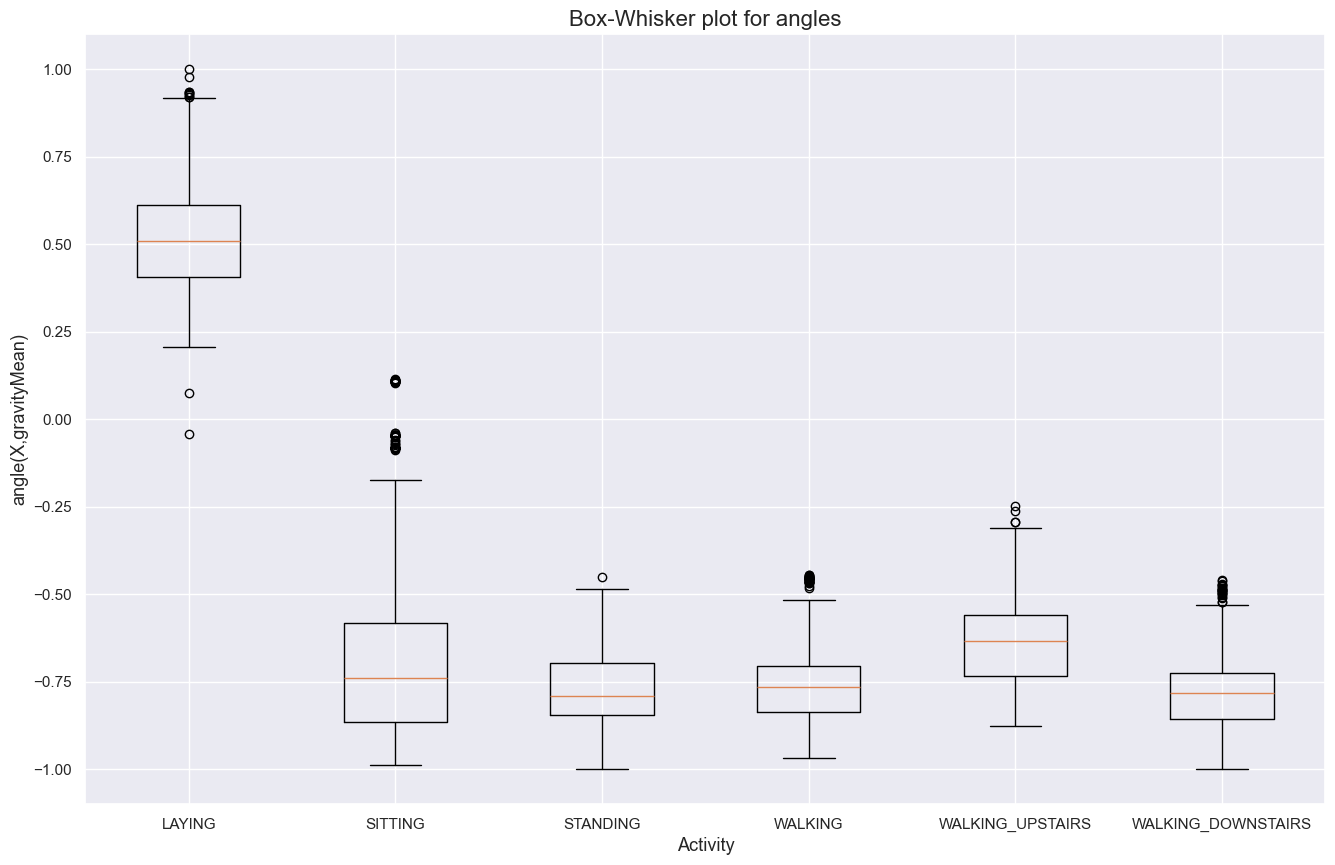

In [101]:
plt.figure(figsize=(16,10))
plt.boxplot([train[(train['Activity'] == 'LAYING')][col], train[(train['Activity'] == 'SITTING')][col],train[(train['Activity'] == 'STANDING')][col],train[(train['Activity'] == 'WALKING')][col],train[(train['Activity'] == 'WALKING_UPSTAIRS')][col],train[(train['Activity'] == 'WALKING_DOWNSTAIRS')][col]], positions=[1, 2, 3, 4, 5, 6])
plt.xticks([1, 2, 3, 4, 5, 6], ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
plt.xlabel('Activity', fontsize = 13)
plt.ylabel('angle(X,gravityMean)', fontsize = 13)
plt.title('Box-Whisker plot for angles', fontsize = 16)



### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

In [104]:
col = 'tBodyAcc-max()-X'

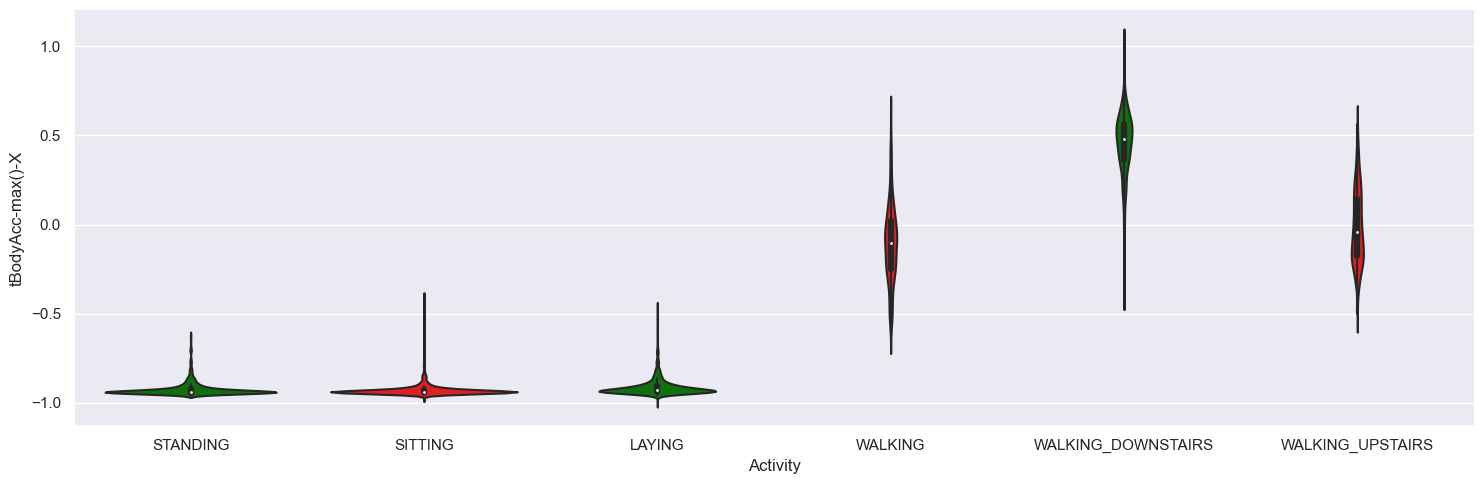

In [115]:
sns.catplot(data=train, x="Activity", y="tBodyAcc-max()-X",
            palette=['green', 'red'],
            height=5, 
            aspect=3,kind='violin',
            split=True)
plt.show()

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим. 

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (boxenplot - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

Text(0.5, 1.0, 'STATIC ACTIVITIES')

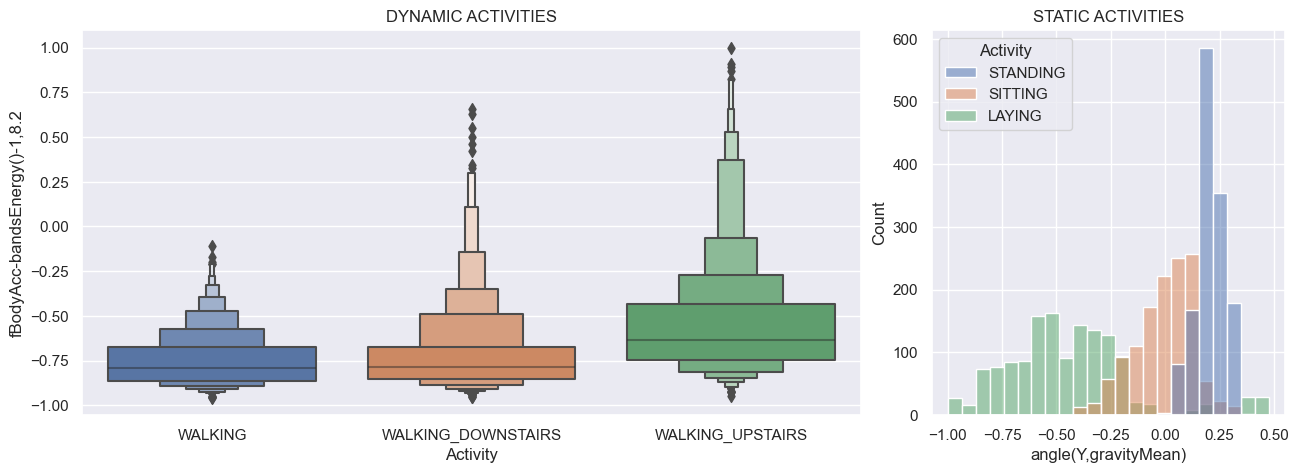

In [162]:
from matplotlib.gridspec import GridSpec
plt.figure(figsize = (21, 5))
grid = GridSpec(1, 4)
plt.subplot(grid[0 , :-2])
static = train[(train['Activity'] == 'STANDING') | (train['Activity'] == 'SITTING') | (train['Activity'] == 'LAYING')]
dynamic = train[(train['Activity'] == 'WALKING') | (train['Activity'] == 'WALKING_DOWNSTAIRS') | (train['Activity'] == 'WALKING_UPSTAIRS')]
sns.boxenplot(data = dynamic, x = 'Activity', y = 'fBodyAcc-bandsEnergy()-1,8.2')
plt.title('DYNAMIC ACTIVITIES')
plt.subplot(grid[0 , -2:-1])

sns.histplot(data = static, x = 'angle(Y,gravityMean)', hue = 'Activity')
plt.title('STATIC ACTIVITIES')

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два! 

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория? 

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

Text(0.5, 1.0, 'Angle plot')

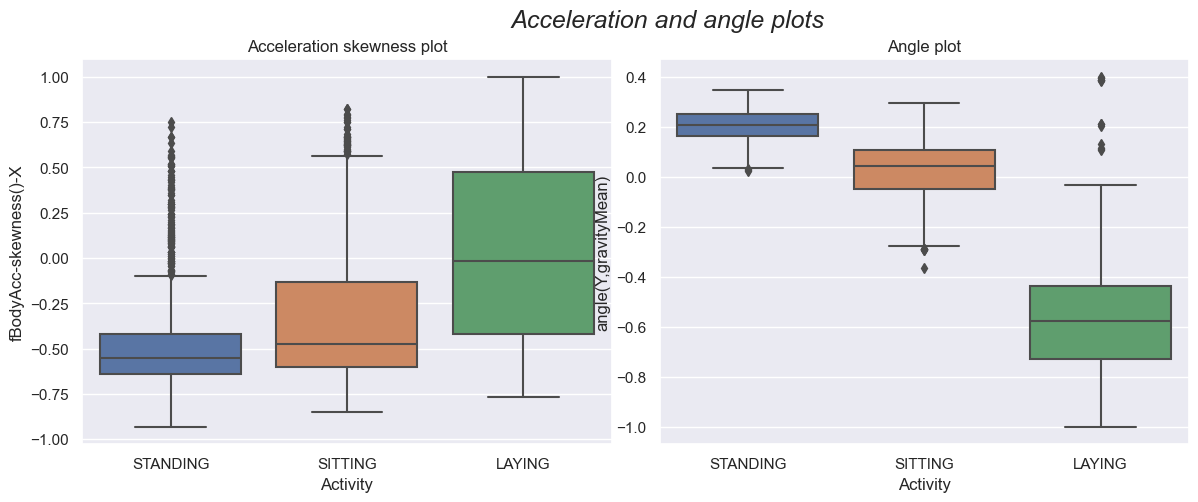

In [199]:
plt.figure(figsize = (18, 5))
plt.suptitle("Acceleration and angle plots", x = 0.45, fontstyle = 'oblique', fontsize = 18)
grid = GridSpec(1, 5)
plt.subplot(grid[0 , :-3])
sns.boxplot(data = static, y = "fBodyAcc-skewness()-X", x = "Activity")
plt.title("Acceleration skewness plot")
plt.subplot(grid[0 , -3:-1])
sns.boxplot(data = static[(static["fBodyAcc-skewness()-X"] < -0.376)], y = "angle(Y,gravityMean)", x = "Activity")
plt.title("Angle plot")


Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет). 

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

Text(0.5, 1.0, 'Minimal gravity acceleration')

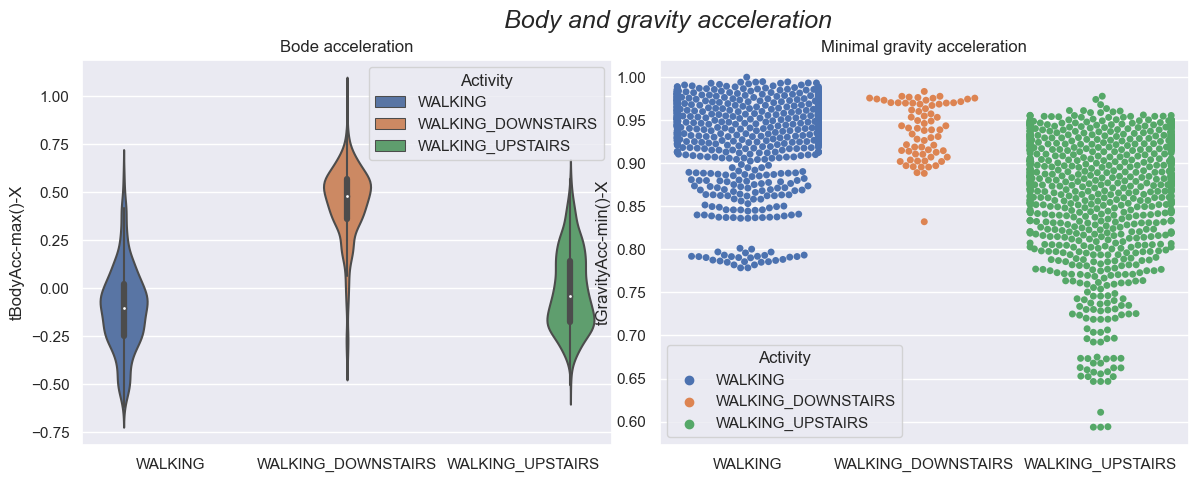

In [204]:
plt.figure(figsize = (18, 5))
plt.suptitle("Body and gravity acceleration", x = 0.45, fontstyle = 'oblique', fontsize = 18)
grid = GridSpec(1, 5)
plt.subplot(grid[0 , :-3])
sns.violinplot(data = dynamic, y = "tBodyAcc-max()-X", x = "Activity", hue = 'Activity')
plt.xlabel("")
plt.title("Bode acceleration")
plt.subplot(grid[0 , -3:-1])
sns.swarmplot(data = dynamic[(dynamic["tBodyAcc-max()-X"] < 0.157)], y = "tGravityAcc-min()-X", x = "Activity", hue = 'Activity')
plt.xlabel("")
plt.title("Minimal gravity acceleration")

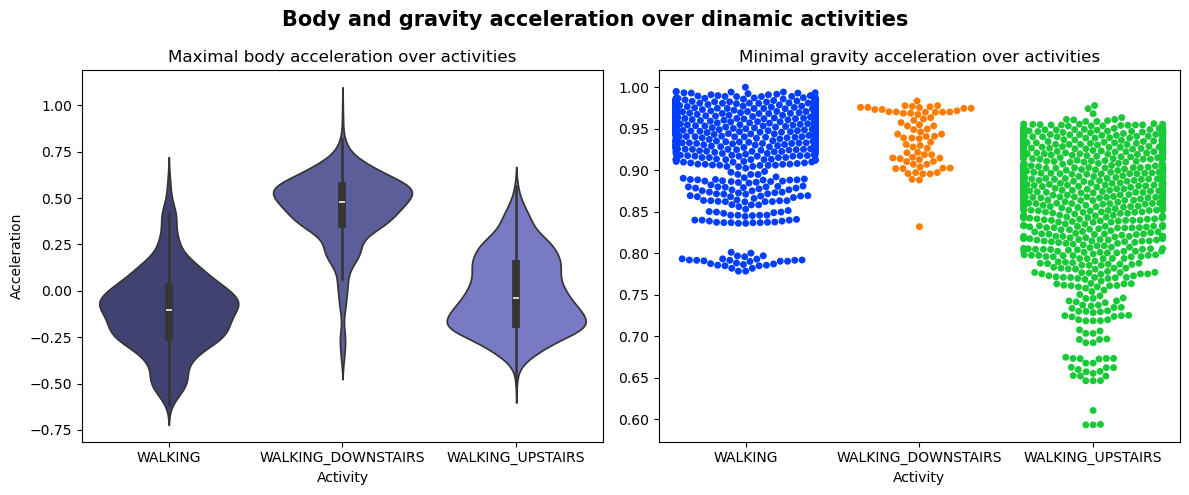

### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html). 

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [205]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [206]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 4min 19s, sys: 1min 4s, total: 5min 23s
Wall time: 56.4 s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [207]:
import plotly.express as px

In [209]:
tsne

TSNE(n_components=3, random_state=666)

In [215]:
train.head()

tBodyAccMag-mean()  tBodyGyroJerk-mad()-X  tGravityAcc-min()-X  \
0           -0.959434              -0.992165             0.977436   
1           -0.979289              -0.989876             0.984520   
2           -0.983703              -0.987868             0.986770   
3           -0.986542              -0.991241             0.986821   
4           -0.992827              -0.992882             0.987434   

   tBodyAcc-max()-X  fBodyAcc-bandsEnergy()-1,8.2  angle(X,gravityMean)  \
0         -0.934724                     -0.993592             -0.841247   
1         -0.943068                     -0.998235             -0.844788   
2         -0.938692                     -0.999388             -0.848933   
3         -0.938692                     -0.999807             -0.848649   
4         -0.942469                     -0.999806             -0.847865   

   angle(Y,gravityMean)  angle(Z,gravityMean)  fBodyAcc-skewness()-X  subject  \
0              0.179941             -0.058627               0.142051        1   
1              0.180289             -0.054317              -0.692541        1   
2              0.180637             -0.049118              -0.727227        1   
3              0.181935             -0.047663              -0.599118        1   
4              0.185151             -0.043892              -0.676997        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING

In [217]:
df_3_comp.head()

x          y          z  Activity
0 -5.006613  -9.080531   9.438540  STANDING
1  1.421238 -13.714829 -12.201051  STANDING
2  2.313838 -14.213661 -12.732656  STANDING
3 -1.434677 -12.517327  -8.130897  STANDING
4  0.826048 -13.914650 -11.485461  STANDING

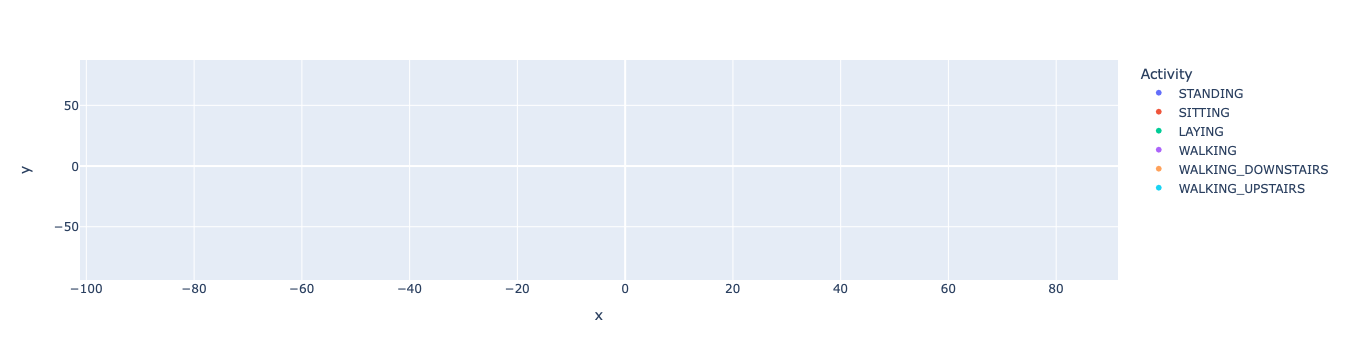

In [240]:

px.scatter(df_2_comp, y = "y",x =  "x", color = "Activity")


Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

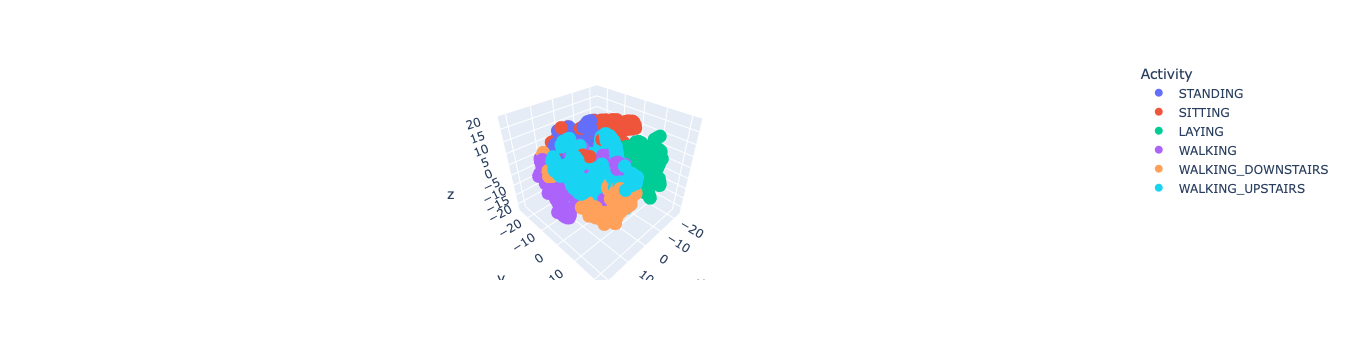

In [236]:
px.scatter_3d(df_3_comp, y = "y",x =  "x",z = "z", color = "Activity", size_max = 18)

__Место для мема и/или фидбэка__